# **Traditional LSTM | Next Day Predictions | Normalized**

In [1]:
import numpy  as np
import pandas as pd

## Read In Datasets

* `msftNextDayNorm.csv`
* `appleNextDayNorm.csv`

In [2]:
aaplDf = pd.read_csv('appleNextDayNorm.csv')
msftDf = pd.read_csv('msftNextDayNorm.csv')

## Drop Attributes That Can't Be Used as Features

In [3]:
# Stock and Sentiment features

aaplDf = aaplDf.drop(columns=['Unnamed: 0'])
msftDf = msftDf.drop(columns=['Unnamed: 0'])

# Only stock Features

# aaplDf = aaplDf.drop(columns=['Unnamed: 0', 'neg', 'neu', 'pos', 'compound'])
# msftDf = msftDf.drop(columns=['Unnamed: 0', 'neg', 'neu', 'pos', 'compound'])

# Only Sentiment 

# aaplDf = aaplDf.drop(columns=['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Volume'])
# msftDf = msftDf.drop(columns=['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Volume'])


In [4]:
aaplDf.head()
#msftDf.head()


,Open,Close,High,Low,Volume,neg,neu,pos,compound,label
0,3.278571,3.261429,3.297500,3.217857,795079600,0.032,0.905,0.063,0.7707,0
1,3.281429,3.254286,3.287500,3.232143,709536800,0.011,0.904,0.085,0.8720,0
2,3.237143,3.208214,3.263929,3.202500,638184400,0.029,0.878,0.093,0.6858,0
3,3.215357,3.108572,3.232143,3.103571,1004827600,0.091,0.869,0.040,-0.6712,1
4,3.115357,3.152143,3.192500,3.107143,784277200,0.084,0.848,0.069,-0.1796,0


## Split into Data (`x`) and Label (`y`) Sets

In [5]:
yAppl = aaplDf['label']
xAppl = aaplDf.drop(columns = ['label'])

yMsft = msftDf['label']
xMsft = msftDf.drop(columns = ['label'])


## Split into Train and Test Sets

In [6]:
from sklearn.model_selection import train_test_split
# 90 - 10 : Train - Test Split
xTrainAppl, xTestAppl, yTrainAppl, yTestAppl = train_test_split(xAppl, yAppl, test_size=0.1, shuffle = False)
xTrainMsft, xTestMsft, yTrainMsft, yTestMsft = train_test_split(xMsft, yMsft, test_size=0.1, shuffle = False)


## Normalize the Data (`x`) Sets Using `MinMaxScaler`

In [7]:
from sklearn.preprocessing import MinMaxScaler

def scaleX(trainX, testX):
    scaler = MinMaxScaler()
    scaler.fit(trainX)
    trainX = scaler.transform(trainX)
    testX  = scaler.transform(testX)
    return trainX, testX

xTrainAppl, xTestAppl = scaleX(xTrainAppl, xTestAppl)
xTrainMsft, xTestMsft = scaleX(xTrainMsft, xTestMsft)


## Convert Label (`y`) Sets to `numpy` arrays

In [8]:
yTrainAppl = np.array(yTrainAppl.values.tolist())
yTestAppl  = np.array(yTestAppl.values.tolist())

yTrainMsft = np.array(yTrainMsft.values.tolist())
yTestMsft  = np.array(yTestMsft.values.tolist())


## Reshape Data(`x`) Sets Using `numpy`

In [9]:
xTrainAppl = np.reshape(xTrainAppl, (len(xTrainAppl) , 1 , xTrainAppl.shape[1]) ) # 5 because there are 5 features
xTestAppl  = np.reshape(xTestAppl,  (len(xTestAppl)  , 1 , xTestAppl.shape[1]) ) # 5 because there are 5 features

xTrainMsft = np.reshape(xTrainMsft, (len(xTrainMsft) , 1 , xTrainMsft.shape[1]) ) # 5 because there are 5 features
xTestMsft  = np.reshape(xTestMsft,  (len(xTestMsft)  , 1 , xTestMsft.shape[1]) ) # 5 because there are 5 features


## Traditional LSTM

In [10]:
import tensorflow   as     tf
from   tensorflow   import keras
from   keras        import Sequential
from   keras.layers import Dense
from   keras.layers import LSTM
from   keras.layers import Dropout

In [11]:
def makeLSTM(xTrain):
    model = Sequential()
    model.add (LSTM  (units = 50, activation = 'relu', input_shape = (xTrain.shape[1], xTrain.shape[2]), return_sequences=True)) # input_shape = (n_steps, n_features)
#     model.add(Dropout(0.25))

    model.add (LSTM  (units = 25, activation = 'relu', return_sequences=True)) # input_shape = (n_steps, n_features)
#     model.add(Dropout(0.25))
    model.add (Dense (units = 1, activation = 'sigmoid'))
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer = opt, loss = "binary_crossentropy", metrics=['accuracy'])
    return model

### Make LSTM for Each Set

In [12]:
applLSTM = makeLSTM(xTrainAppl)
msftLSTM = makeLSTM(xTrainMsft)


### Fit Model for Each Set

In [13]:
applHist = applLSTM.fit(xTrainAppl, yTrainAppl, batch_size = 72, validation_data=(xTestAppl, yTestAppl), epochs = 500, shuffle=False)
msftHist = msftLSTM.fit(xTrainMsft, yTrainMsft, batch_size = 72, validation_data=(xTestMsft, yTestMsft), epochs = 500, shuffle=False)

Epoch 1/500
30/30 [==============================] - 0s 10ms/step - loss: 0.6929 - accuracy: 0.5208 - val_loss: 0.6925 - val_accuracy: 0.5279
Epoch 2/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5223 - val_loss: 0.6924 - val_accuracy: 0.5279
Epoch 3/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5223 - val_loss: 0.6923 - val_accuracy: 0.5279
Epoch 4/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5223 - val_loss: 0.6922 - val_accuracy: 0.5279
Epoch 5/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5223 - val_loss: 0.6921 - val_accuracy: 0.5279
Epoch 6/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5223 - val_loss: 0.6921 - val_accuracy: 0.5279
Epoch 7/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5223 - val_loss: 0.6921 - val_accuracy: 0.5279
Epoch 8/500


Epoch 59/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5251 - val_loss: 0.6918 - val_accuracy: 0.5365
Epoch 60/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5314 - val_loss: 0.6923 - val_accuracy: 0.5322
Epoch 61/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5242 - val_loss: 0.6929 - val_accuracy: 0.5322
Epoch 62/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5318 - val_loss: 0.6918 - val_accuracy: 0.5365
Epoch 63/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5294 - val_loss: 0.6929 - val_accuracy: 0.5322
Epoch 64/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5304 - val_loss: 0.6930 - val_accuracy: 0.5322
Epoch 65/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5280 - val_loss: 0.6921 - val_accuracy: 0.5322
Epoch 

30/30 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5385 - val_loss: 0.7002 - val_accuracy: 0.5193
Epoch 117/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5390 - val_loss: 0.7007 - val_accuracy: 0.5279
Epoch 118/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5428 - val_loss: 0.7003 - val_accuracy: 0.5236
Epoch 119/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5428 - val_loss: 0.7009 - val_accuracy: 0.5322
Epoch 120/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5404 - val_loss: 0.7006 - val_accuracy: 0.5193
Epoch 121/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5443 - val_loss: 0.7013 - val_accuracy: 0.5365
Epoch 122/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5424 - val_loss: 0.7011 - val_accuracy: 0.5193
Epoch 123/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5428 - val_loss: 0.7077 - val_accuracy: 0.5236
Epoch 174/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5457 - val_loss: 0.7079 - val_accuracy: 0.5193
Epoch 175/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5448 - val_loss: 0.7077 - val_accuracy: 0.5236
Epoch 176/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5443 - val_loss: 0.7079 - val_accuracy: 0.5279
Epoch 177/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5424 - val_loss: 0.7078 - val_accuracy: 0.5279
Epoch 178/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5414 - val_loss: 0.7082 - val_accuracy: 0.5236
Epoch 179/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5424 - val_loss: 0.7085 - val_accuracy: 0.5150
Epoch 180/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5562 - val_loss: 0.7128 - val_accuracy: 0.5322
Epoch 231/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5510 - val_loss: 0.7138 - val_accuracy: 0.5322
Epoch 232/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5491 - val_loss: 0.7134 - val_accuracy: 0.5365
Epoch 233/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5553 - val_loss: 0.7134 - val_accuracy: 0.5322
Epoch 234/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5553 - val_loss: 0.7138 - val_accuracy: 0.5322
Epoch 235/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5491 - val_loss: 0.7141 - val_accuracy: 0.5408
Epoch 236/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5543 - val_loss: 0.7135 - val_accuracy: 0.5322
Epoch 237/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.5529 - val_loss: 0.7175 - val_accuracy: 0.5365
Epoch 288/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5519 - val_loss: 0.7179 - val_accuracy: 0.5408
Epoch 289/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5548 - val_loss: 0.7174 - val_accuracy: 0.5365
Epoch 290/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5534 - val_loss: 0.7172 - val_accuracy: 0.5365
Epoch 291/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5543 - val_loss: 0.7178 - val_accuracy: 0.5408
Epoch 292/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5524 - val_loss: 0.7176 - val_accuracy: 0.5365
Epoch 293/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5548 - val_loss: 0.7181 - val_accuracy: 0.5322
Epoch 294/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5582 - val_loss: 0.7232 - val_accuracy: 0.5536
Epoch 345/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5606 - val_loss: 0.7227 - val_accuracy: 0.5322
Epoch 346/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.5577 - val_loss: 0.7241 - val_accuracy: 0.5451
Epoch 347/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.5591 - val_loss: 0.7236 - val_accuracy: 0.5494
Epoch 348/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5586 - val_loss: 0.7238 - val_accuracy: 0.5494
Epoch 349/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5596 - val_loss: 0.7233 - val_accuracy: 0.5408
Epoch 350/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5582 - val_loss: 0.7247 - val_accuracy: 0.5322
Epoch 351/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.5644 - val_loss: 0.7262 - val_accuracy: 0.5279
Epoch 402/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.5639 - val_loss: 0.7263 - val_accuracy: 0.5236
Epoch 403/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.5668 - val_loss: 0.7255 - val_accuracy: 0.5236
Epoch 404/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.5701 - val_loss: 0.7268 - val_accuracy: 0.5279
Epoch 405/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.5706 - val_loss: 0.7267 - val_accuracy: 0.5236
Epoch 406/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.5697 - val_loss: 0.7265 - val_accuracy: 0.5193
Epoch 407/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.5720 - val_loss: 0.7260 - val_accuracy: 0.5279
Epoch 408/500

30/30 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.5701 - val_loss: 0.7334 - val_accuracy: 0.5150
Epoch 459/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.5711 - val_loss: 0.7353 - val_accuracy: 0.4979
Epoch 460/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.5682 - val_loss: 0.7347 - val_accuracy: 0.5107
Epoch 461/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.5725 - val_loss: 0.7341 - val_accuracy: 0.5064
Epoch 462/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.5716 - val_loss: 0.7349 - val_accuracy: 0.5021
Epoch 463/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5677 - val_loss: 0.7360 - val_accuracy: 0.5021
Epoch 464/500
30/30 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.5735 - val_loss: 0.7362 - val_accuracy: 0.4936
Epoch 465/500

Epoch 14/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5199 - val_loss: 0.6929 - val_accuracy: 0.5149
Epoch 15/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5199 - val_loss: 0.6930 - val_accuracy: 0.5149
Epoch 16/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5199 - val_loss: 0.6930 - val_accuracy: 0.5149
Epoch 17/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5199 - val_loss: 0.6930 - val_accuracy: 0.5149
Epoch 18/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5199 - val_loss: 0.6930 - val_accuracy: 0.5149
Epoch 19/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5199 - val_loss: 0.6931 - val_accuracy: 0.5149
Epoch 20/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5199 - val_loss: 0.6931 - val_accuracy: 0.5149
Epoch 

Epoch 72/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5431 - val_loss: 0.7008 - val_accuracy: 0.5000
Epoch 73/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5514 - val_loss: 0.7226 - val_accuracy: 0.5149
Epoch 74/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5423 - val_loss: 0.7053 - val_accuracy: 0.5224
Epoch 75/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5514 - val_loss: 0.7259 - val_accuracy: 0.5299
Epoch 76/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5473 - val_loss: 0.7059 - val_accuracy: 0.5299
Epoch 77/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5531 - val_loss: 0.7294 - val_accuracy: 0.5149
Epoch 78/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5489 - val_loss: 0.7042 - val_accuracy: 0.4925
Epoch 

17/17 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.5771 - val_loss: 0.7909 - val_accuracy: 0.5299
Epoch 130/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.5697 - val_loss: 0.7656 - val_accuracy: 0.5149
Epoch 131/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.5755 - val_loss: 0.7999 - val_accuracy: 0.5149
Epoch 132/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5755 - val_loss: 0.7467 - val_accuracy: 0.5448
Epoch 133/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5705 - val_loss: 0.8001 - val_accuracy: 0.5000
Epoch 134/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5713 - val_loss: 0.7696 - val_accuracy: 0.5224
Epoch 135/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.5788 - val_loss: 0.8049 - val_accuracy: 0.5149
Epoch 136/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.5837 - val_loss: 0.8543 - val_accuracy: 0.5000
Epoch 187/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.5846 - val_loss: 0.8510 - val_accuracy: 0.4925
Epoch 188/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.5813 - val_loss: 0.8562 - val_accuracy: 0.5000
Epoch 189/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.5788 - val_loss: 0.8514 - val_accuracy: 0.4851
Epoch 190/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.5779 - val_loss: 0.8624 - val_accuracy: 0.5000
Epoch 191/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.5796 - val_loss: 0.8288 - val_accuracy: 0.5149
Epoch 192/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.5821 - val_loss: 0.8752 - val_accuracy: 0.5000
Epoch 193/500

17/17 [==============================] - 0s 3ms/step - loss: 0.6667 - accuracy: 0.5896 - val_loss: 0.8977 - val_accuracy: 0.5075
Epoch 244/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.5771 - val_loss: 0.9380 - val_accuracy: 0.5075
Epoch 245/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.5796 - val_loss: 0.8566 - val_accuracy: 0.5149
Epoch 246/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.5771 - val_loss: 0.9319 - val_accuracy: 0.5075
Epoch 247/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.5813 - val_loss: 0.8828 - val_accuracy: 0.5224
Epoch 248/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.5779 - val_loss: 0.9206 - val_accuracy: 0.5000
Epoch 249/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.5804 - val_loss: 0.9160 - val_accuracy: 0.4925
Epoch 250/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.5788 - val_loss: 0.9994 - val_accuracy: 0.5000
Epoch 301/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.5813 - val_loss: 0.8876 - val_accuracy: 0.5075
Epoch 302/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.5829 - val_loss: 1.0059 - val_accuracy: 0.5000
Epoch 303/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.5912 - val_loss: 0.9257 - val_accuracy: 0.5224
Epoch 304/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.5871 - val_loss: 0.9500 - val_accuracy: 0.5075
Epoch 305/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.5813 - val_loss: 0.9946 - val_accuracy: 0.5000
Epoch 306/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.5796 - val_loss: 0.8536 - val_accuracy: 0.5224
Epoch 307/500

17/17 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.5862 - val_loss: 1.0469 - val_accuracy: 0.5075
Epoch 358/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.5896 - val_loss: 0.8631 - val_accuracy: 0.5373
Epoch 359/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.5887 - val_loss: 1.0238 - val_accuracy: 0.5149
Epoch 360/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.5854 - val_loss: 1.0337 - val_accuracy: 0.4925
Epoch 361/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.5945 - val_loss: 0.9300 - val_accuracy: 0.5000
Epoch 362/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.5920 - val_loss: 1.0508 - val_accuracy: 0.5149
Epoch 363/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.5945 - val_loss: 0.8477 - val_accuracy: 0.5299
Epoch 364/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.5987 - val_loss: 0.9020 - val_accuracy: 0.5224
Epoch 415/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.5945 - val_loss: 1.0751 - val_accuracy: 0.5000
Epoch 416/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.5896 - val_loss: 1.1004 - val_accuracy: 0.5149
Epoch 417/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.5954 - val_loss: 0.9948 - val_accuracy: 0.5075
Epoch 418/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.5887 - val_loss: 1.1186 - val_accuracy: 0.5075
Epoch 419/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.6003 - val_loss: 1.0682 - val_accuracy: 0.5075
Epoch 420/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.5945 - val_loss: 1.1006 - val_accuracy: 0.5224
Epoch 421/500

17/17 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.6103 - val_loss: 1.1394 - val_accuracy: 0.5000
Epoch 472/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.6128 - val_loss: 1.1533 - val_accuracy: 0.4925
Epoch 473/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.6153 - val_loss: 1.1103 - val_accuracy: 0.4925
Epoch 474/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.6095 - val_loss: 1.1643 - val_accuracy: 0.5000
Epoch 475/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.6095 - val_loss: 1.1490 - val_accuracy: 0.4776
Epoch 476/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.6111 - val_loss: 1.1453 - val_accuracy: 0.4925
Epoch 477/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.6119 - val_loss: 1.1692 - val_accuracy: 0.5000
Epoch 478/500

### Make Plots to Evaluate Each Model

In [14]:
import matplotlib.pyplot as plt

def makePlots(title, hist):
    train_acc   =  hist.history['accuracy']
    test_acc    =  hist.history['val_accuracy']
    train_loss  =  hist.history['loss']
    test_loss   =  hist.history['val_loss']

    fig= plt.figure(figsize=(10,5))

    plt.subplot(2, 1, 1) # (2-row , 1-column figure , 1st figure)
    plt.plot(train_acc, label = 'Training Accuracy')
    plt.plot(test_acc, label = 'Test Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.title(title + ' | Training and Test Accuracy')
    plt.show()
    
    fig.savefig(title + '_accuracy.jpg')

    fig= plt.figure(figsize=(10,5))

    plt.subplot(2, 1, 1) # (2-row , 1-column figure , 2nd figure)
    plt.plot(train_loss, label = 'Training Loss')
    plt.plot(test_loss, label = 'Testing Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.title(title + ' | Training and Testing Loss')
    plt.show()
    
    fig.savefig(title + '_loss.jpg')
    return

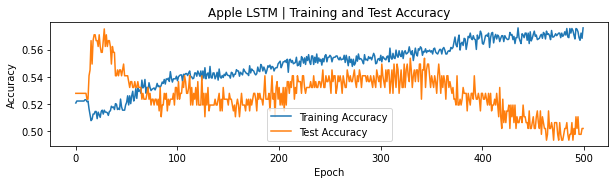

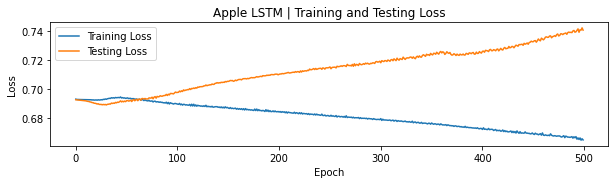

In [15]:
makePlots("Apple LSTM" , applHist)

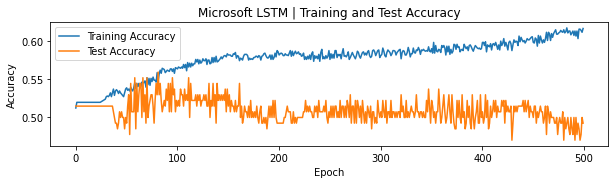

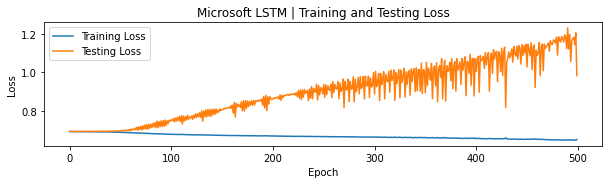

In [16]:
makePlots("Microsoft LSTM" , msftHist)

## Bidirectional LSTM

In [17]:
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

def makeBidirectionalLSTM(xTrain):
    model = Sequential()
    
    model.add (Bidirectional(LSTM(units =128 , activation = 'relu', return_sequences=True),
                             input_shape=(xTrain.shape[1], xTrain.shape[2])))
    
#     model.add(Dropout(0.25))

    model.add (Bidirectional(LSTM(units = 64, activation = 'relu', return_sequences=True)))
#     model.add(Dropout(0.25))

    model.add (TimeDistributed(Dense (units = 1, activation = 'sigmoid')))
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer = opt, loss = "binary_crossentropy", metrics=['accuracy'])
    return model


### Make Bidirectional LSTM for Each Set

In [18]:
applBiLSTM = makeBidirectionalLSTM(xTrainAppl)
msftBiLSTM = makeBidirectionalLSTM(xTrainMsft)


### Fit Model for Each Set

In [19]:
applBiHist = applBiLSTM.fit(xTrainAppl, yTrainAppl, batch_size = 72, validation_data=(xTestAppl, yTestAppl), epochs = 500, shuffle=False)
msftBiHist = msftBiLSTM.fit(xTrainMsft, yTrainMsft, batch_size = 72, validation_data=(xTestMsft, yTestMsft), epochs = 500, shuffle=False)

Epoch 1/500
30/30 [==============================] - 0s 16ms/step - loss: 0.6926 - accuracy: 0.5223 - val_loss: 0.6917 - val_accuracy: 0.5279
Epoch 2/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5223 - val_loss: 0.6918 - val_accuracy: 0.5279
Epoch 3/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5223 - val_loss: 0.6918 - val_accuracy: 0.5279
Epoch 4/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5223 - val_loss: 0.6918 - val_accuracy: 0.5279
Epoch 5/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5223 - val_loss: 0.6917 - val_accuracy: 0.5279
Epoch 6/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5237 - val_loss: 0.6916 - val_accuracy: 0.5279
Epoch 7/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5237 - val_loss: 0.6913 - val_accuracy: 0.5279
Epoch 8/500


Epoch 59/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5452 - val_loss: 0.7012 - val_accuracy: 0.5451
Epoch 60/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6858 - accuracy: 0.5539 - val_loss: 0.7009 - val_accuracy: 0.5408
Epoch 61/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5515 - val_loss: 0.7017 - val_accuracy: 0.5236
Epoch 62/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5462 - val_loss: 0.7023 - val_accuracy: 0.5408
Epoch 63/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.5481 - val_loss: 0.7018 - val_accuracy: 0.5279
Epoch 64/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5524 - val_loss: 0.7022 - val_accuracy: 0.5451
Epoch 65/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5491 - val_loss: 0.7020 - val_accuracy: 0.5322
Epoch 

30/30 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.5735 - val_loss: 0.7246 - val_accuracy: 0.4850
Epoch 117/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.5730 - val_loss: 0.7242 - val_accuracy: 0.4721
Epoch 118/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.5773 - val_loss: 0.7247 - val_accuracy: 0.4721
Epoch 119/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.5764 - val_loss: 0.7268 - val_accuracy: 0.4764
Epoch 120/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6696 - accuracy: 0.5787 - val_loss: 0.7261 - val_accuracy: 0.4721
Epoch 121/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.5802 - val_loss: 0.7267 - val_accuracy: 0.4721
Epoch 122/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.5773 - val_loss: 0.7261 - val_accuracy: 0.4893
Epoch 123/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6586 - accuracy: 0.5974 - val_loss: 0.7434 - val_accuracy: 0.4979
Epoch 174/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6605 - accuracy: 0.5931 - val_loss: 0.7418 - val_accuracy: 0.4979
Epoch 175/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.5969 - val_loss: 0.7420 - val_accuracy: 0.5021
Epoch 176/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6588 - accuracy: 0.5950 - val_loss: 0.7391 - val_accuracy: 0.4936
Epoch 177/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6580 - accuracy: 0.5993 - val_loss: 0.7408 - val_accuracy: 0.4807
Epoch 178/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6583 - accuracy: 0.5936 - val_loss: 0.7418 - val_accuracy: 0.4979
Epoch 179/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6571 - accuracy: 0.5998 - val_loss: 0.7420 - val_accuracy: 0.4678
Epoch 180/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6535 - accuracy: 0.5950 - val_loss: 0.7481 - val_accuracy: 0.4893
Epoch 231/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.5955 - val_loss: 0.7626 - val_accuracy: 0.5064
Epoch 232/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6488 - accuracy: 0.6089 - val_loss: 0.7352 - val_accuracy: 0.4936
Epoch 233/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.5898 - val_loss: 0.7498 - val_accuracy: 0.5021
Epoch 234/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6517 - accuracy: 0.5945 - val_loss: 0.7524 - val_accuracy: 0.5150
Epoch 235/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6535 - accuracy: 0.5989 - val_loss: 0.7493 - val_accuracy: 0.4979
Epoch 236/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6523 - accuracy: 0.6051 - val_loss: 0.7467 - val_accuracy: 0.4850
Epoch 237/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6274 - accuracy: 0.6233 - val_loss: 0.7710 - val_accuracy: 0.4936
Epoch 288/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0.6228 - val_loss: 0.7726 - val_accuracy: 0.5021
Epoch 289/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6267 - accuracy: 0.6242 - val_loss: 0.7680 - val_accuracy: 0.4979
Epoch 290/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6267 - accuracy: 0.6281 - val_loss: 0.7683 - val_accuracy: 0.5064
Epoch 291/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6260 - accuracy: 0.6266 - val_loss: 0.7687 - val_accuracy: 0.4979
Epoch 292/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6261 - accuracy: 0.6261 - val_loss: 0.7712 - val_accuracy: 0.5021
Epoch 293/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6261 - accuracy: 0.6257 - val_loss: 0.7665 - val_accuracy: 0.5021
Epoch 294/500

30/30 [==============================] - 0s 4ms/step - loss: 0.6178 - accuracy: 0.6391 - val_loss: 0.7818 - val_accuracy: 0.5236
Epoch 345/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6173 - accuracy: 0.6391 - val_loss: 0.7777 - val_accuracy: 0.5236
Epoch 346/500
30/30 [==============================] - 0s 4ms/step - loss: 0.6164 - accuracy: 0.6438 - val_loss: 0.7780 - val_accuracy: 0.5021
Epoch 347/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6154 - accuracy: 0.6438 - val_loss: 0.7757 - val_accuracy: 0.5150
Epoch 348/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6166 - accuracy: 0.6419 - val_loss: 0.7984 - val_accuracy: 0.4979
Epoch 349/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6187 - accuracy: 0.6381 - val_loss: 0.7737 - val_accuracy: 0.5150
Epoch 350/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6156 - accuracy: 0.6386 - val_loss: 0.7816 - val_accuracy: 0.4936
Epoch 351/500

30/30 [==============================] - 0s 4ms/step - loss: 0.6040 - accuracy: 0.6496 - val_loss: 0.7950 - val_accuracy: 0.4936
Epoch 402/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6101 - accuracy: 0.6438 - val_loss: 0.7884 - val_accuracy: 0.5021
Epoch 403/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6110 - accuracy: 0.6462 - val_loss: 0.8007 - val_accuracy: 0.4807
Epoch 404/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6127 - accuracy: 0.6395 - val_loss: 0.7999 - val_accuracy: 0.4807
Epoch 405/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6066 - accuracy: 0.6515 - val_loss: 0.7986 - val_accuracy: 0.4850
Epoch 406/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6028 - accuracy: 0.6568 - val_loss: 0.7926 - val_accuracy: 0.5236
Epoch 407/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6033 - accuracy: 0.6491 - val_loss: 0.7932 - val_accuracy: 0.5021
Epoch 408/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6065 - accuracy: 0.6477 - val_loss: 0.9779 - val_accuracy: 0.5322
Epoch 459/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6159 - accuracy: 0.6506 - val_loss: 0.9005 - val_accuracy: 0.5279
Epoch 460/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6178 - accuracy: 0.6371 - val_loss: 0.8006 - val_accuracy: 0.4893
Epoch 461/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6402 - accuracy: 0.6242 - val_loss: 0.7910 - val_accuracy: 0.5107
Epoch 462/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6182 - accuracy: 0.6405 - val_loss: 0.9343 - val_accuracy: 0.5322
Epoch 463/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6586 - accuracy: 0.6190 - val_loss: 0.8024 - val_accuracy: 0.4850
Epoch 464/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.6506 - val_loss: 0.8094 - val_accuracy: 0.4807
Epoch 465/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5274 - val_loss: 0.6946 - val_accuracy: 0.5149
Epoch 16/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5257 - val_loss: 0.6951 - val_accuracy: 0.5149
Epoch 17/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5307 - val_loss: 0.6954 - val_accuracy: 0.5149
Epoch 18/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5398 - val_loss: 0.6959 - val_accuracy: 0.5149
Epoch 19/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5456 - val_loss: 0.6964 - val_accuracy: 0.5075
Epoch 20/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.5473 - val_loss: 0.6968 - val_accuracy: 0.5075
Epoch 21/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5381 - val_loss: 0.6973 - val_accuracy: 0.5075
Epoch 22/500
17/17 

Epoch 73/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6762 - accuracy: 0.5672 - val_loss: 0.7336 - val_accuracy: 0.5149
Epoch 74/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6745 - accuracy: 0.5804 - val_loss: 0.7772 - val_accuracy: 0.4851
Epoch 75/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6760 - accuracy: 0.5730 - val_loss: 0.7328 - val_accuracy: 0.4925
Epoch 76/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6740 - accuracy: 0.5779 - val_loss: 0.7819 - val_accuracy: 0.4776
Epoch 77/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.5713 - val_loss: 0.7402 - val_accuracy: 0.4925
Epoch 78/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6732 - accuracy: 0.5763 - val_loss: 0.7841 - val_accuracy: 0.4925
Epoch 79/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.5738 - val_loss: 0.7479 - val_accuracy: 0.4851
Epoch 

17/17 [==============================] - 0s 4ms/step - loss: 0.6580 - accuracy: 0.5995 - val_loss: 0.9763 - val_accuracy: 0.4776
Epoch 131/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6569 - accuracy: 0.5970 - val_loss: 0.9495 - val_accuracy: 0.4776
Epoch 132/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6602 - accuracy: 0.5862 - val_loss: 0.9243 - val_accuracy: 0.4627
Epoch 133/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6648 - accuracy: 0.5680 - val_loss: 0.9678 - val_accuracy: 0.4627
Epoch 134/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6617 - accuracy: 0.5796 - val_loss: 0.9239 - val_accuracy: 0.4701
Epoch 135/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6589 - accuracy: 0.5705 - val_loss: 0.9723 - val_accuracy: 0.4851
Epoch 136/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6563 - accuracy: 0.6095 - val_loss: 0.9518 - val_accuracy: 0.5000
Epoch 137/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6395 - accuracy: 0.6211 - val_loss: 0.9316 - val_accuracy: 0.4701
Epoch 188/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6397 - accuracy: 0.6169 - val_loss: 0.9990 - val_accuracy: 0.4627
Epoch 189/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6380 - accuracy: 0.6169 - val_loss: 1.0165 - val_accuracy: 0.4701
Epoch 190/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6387 - accuracy: 0.6186 - val_loss: 1.0152 - val_accuracy: 0.4627
Epoch 191/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6378 - accuracy: 0.6169 - val_loss: 1.0424 - val_accuracy: 0.4701
Epoch 192/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6367 - accuracy: 0.6144 - val_loss: 1.0174 - val_accuracy: 0.4776
Epoch 193/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6403 - accuracy: 0.6161 - val_loss: 1.0788 - val_accuracy: 0.5075
Epoch 194/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6242 - accuracy: 0.6401 - val_loss: 1.1273 - val_accuracy: 0.5299
Epoch 245/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6237 - accuracy: 0.6335 - val_loss: 1.2553 - val_accuracy: 0.5149
Epoch 246/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6226 - accuracy: 0.6269 - val_loss: 1.2748 - val_accuracy: 0.5224
Epoch 247/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6276 - accuracy: 0.6277 - val_loss: 1.0892 - val_accuracy: 0.5149
Epoch 248/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6254 - accuracy: 0.6368 - val_loss: 1.3601 - val_accuracy: 0.5149
Epoch 249/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6322 - accuracy: 0.6095 - val_loss: 1.0223 - val_accuracy: 0.5000
Epoch 250/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6361 - accuracy: 0.6186 - val_loss: 1.2886 - val_accuracy: 0.5373
Epoch 251/500

17/17 [==============================] - 0s 4ms/step - loss: 0.6179 - accuracy: 0.6410 - val_loss: 1.0835 - val_accuracy: 0.5149
Epoch 302/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6148 - accuracy: 0.6352 - val_loss: 1.6212 - val_accuracy: 0.5149
Epoch 303/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6172 - accuracy: 0.6360 - val_loss: 1.1852 - val_accuracy: 0.5448
Epoch 304/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6166 - accuracy: 0.6434 - val_loss: 1.3015 - val_accuracy: 0.5224
Epoch 305/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6083 - accuracy: 0.6468 - val_loss: 1.5279 - val_accuracy: 0.5000
Epoch 306/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6113 - accuracy: 0.6434 - val_loss: 1.1380 - val_accuracy: 0.5299
Epoch 307/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6108 - accuracy: 0.6401 - val_loss: 1.5317 - val_accuracy: 0.5149
Epoch 308/500

17/17 [==============================] - 0s 4ms/step - loss: 0.5993 - accuracy: 0.6575 - val_loss: 1.6503 - val_accuracy: 0.5299
Epoch 359/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6012 - accuracy: 0.6584 - val_loss: 1.3927 - val_accuracy: 0.5075
Epoch 360/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5959 - accuracy: 0.6600 - val_loss: 1.7424 - val_accuracy: 0.5075
Epoch 361/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6001 - accuracy: 0.6575 - val_loss: 1.2705 - val_accuracy: 0.5149
Epoch 362/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5998 - accuracy: 0.6567 - val_loss: 1.5282 - val_accuracy: 0.5522
Epoch 363/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5926 - accuracy: 0.6517 - val_loss: 1.7018 - val_accuracy: 0.5149
Epoch 364/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5940 - accuracy: 0.6609 - val_loss: 1.4342 - val_accuracy: 0.4925
Epoch 365/500

17/17 [==============================] - 0s 4ms/step - loss: 0.5846 - accuracy: 0.6650 - val_loss: 1.7721 - val_accuracy: 0.5075
Epoch 416/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5861 - accuracy: 0.6741 - val_loss: 1.8045 - val_accuracy: 0.5448
Epoch 417/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5908 - accuracy: 0.6642 - val_loss: 1.5442 - val_accuracy: 0.5299
Epoch 418/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5841 - accuracy: 0.6658 - val_loss: 1.9015 - val_accuracy: 0.5075
Epoch 419/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5955 - accuracy: 0.6650 - val_loss: 1.2192 - val_accuracy: 0.5000
Epoch 420/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5949 - accuracy: 0.6493 - val_loss: 1.7728 - val_accuracy: 0.5597
Epoch 421/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5892 - accuracy: 0.6642 - val_loss: 1.7003 - val_accuracy: 0.5373
Epoch 422/500

17/17 [==============================] - 0s 4ms/step - loss: 0.5958 - accuracy: 0.6434 - val_loss: 1.9914 - val_accuracy: 0.5821
Epoch 473/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5864 - accuracy: 0.6716 - val_loss: 1.7699 - val_accuracy: 0.5373
Epoch 474/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5859 - accuracy: 0.6600 - val_loss: 1.6503 - val_accuracy: 0.5299
Epoch 475/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5759 - accuracy: 0.6716 - val_loss: 1.9982 - val_accuracy: 0.5075
Epoch 476/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5761 - accuracy: 0.6766 - val_loss: 1.6248 - val_accuracy: 0.5373
Epoch 477/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5781 - accuracy: 0.6692 - val_loss: 1.7615 - val_accuracy: 0.5299
Epoch 478/500
17/17 [==============================] - 0s 4ms/step - loss: 0.5676 - accuracy: 0.6733 - val_loss: 1.9854 - val_accuracy: 0.5224
Epoch 479/500

### Make Plots to Evaluate Each Model

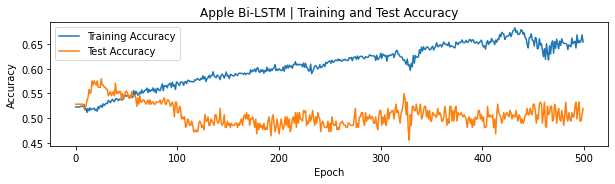

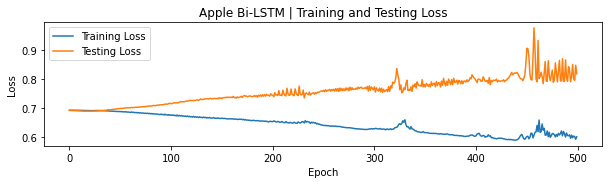

In [20]:
makePlots("Apple Bi-LSTM" , applBiHist)

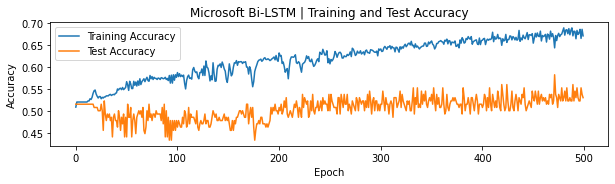

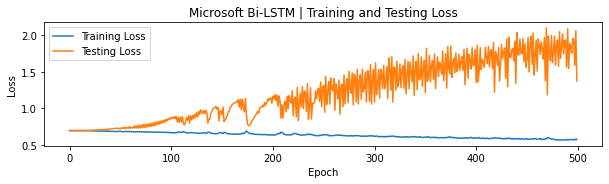

In [21]:
makePlots("Microsoft Bi-LSTM" , msftBiHist)